In [86]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.pitch import Pitch
import requests
from bs4 import BeautifulSoup
import numpy as np

In [59]:
url = 'https://understat.com/player/594'

res = requests.get(url) 
soup = BeautifulSoup(res.content, "lxml") 
scripts = soup.find_all('script')

strings = scripts[4].string

string_with_json_obj = '' 

ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

pl_shots = [i for i in data if i['season'] == '2020']

r_new = 1000
elo_list_rom = []

for i in pl_shots:
    r_new = round(r_new + 32*(float(i['goals'])-float(i['xG'])), 2)
    elo_list_rom.append(r_new) 

Text(0.9, 0.075, 'Data - Understat | @analyticfanatic')

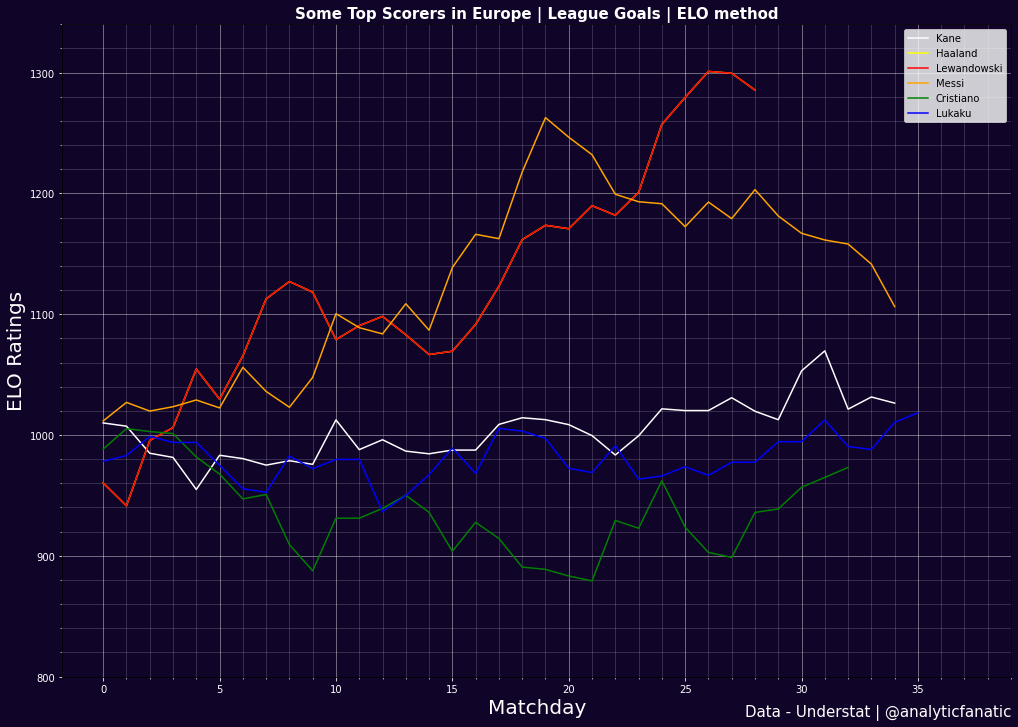

In [118]:
fig = plt.figure(figsize=[17,12])
fig.patch.set_facecolor('#110429')
fig.patch.set_alpha(1.0)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#110429')
ax.patch.set_alpha(1.0)

ax.grid(True, color='black', alpha=0.2)
ax.plot(elo_list_hk,label='Kane', color='white')
ax.plot(elo_list_rl,label='Haaland', color='yellow')
ax.plot(elo_list_eh,label='Lewandowski', color='red')
ax.plot(elo_list_lm,label='Messi', color='orange')
ax.plot(elo_list_cr,label='Cristiano', color='green')
ax.plot(elo_list_rom,label='Lukaku', color='blue')
ax.legend(loc=1)

grd = ax.grid(color="white", alpha=0.3, which="both")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white') 

plt.tick_params(axis='x', which='both' , colors='white')
plt.tick_params(axis='y', which='both', colors='white')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white') 

major_ticks = np.arange(800, 1350, 100)
minor_ticks = np.arange(800, 1350, 20)

major_ticks_x = np.arange(0, 40, 5)
minor_ticks_x = np.arange(0, 40, 1)

ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.2, color="white")
ax.grid(which='major', alpha=0.5, color="white")

plt.title('Some Top Scorers in Europe | League Goals | ELO method', fontweight='bold', fontsize=15, color='white')

plt.xlabel('Matchday', color='white', fontsize=20)
plt.ylabel('ELO Ratings', color='white', fontsize=20)

fig.text(0.9, 0.075, 'Data - Understat | @analyticfanatic', verticalalignment='bottom', color='white', horizontalalignment='right',fontsize=15)